<a href="https://colab.research.google.com/github/madhusudanmahapatra1/Airbnb_booking_data_analysis-/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path='/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'

In [55]:
df=pd.read_csv(path)

In [56]:
df1=df.copy()

In [57]:
df.shape

(48895, 16)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [44]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Finding null values in Dataframe

In [46]:
df1.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

## Treatment of null values

In [47]:
df1["name"].isnull().value_counts()

False    48879
True        16
Name: name, dtype: int64

In [48]:
df1["name"].fillna("unknown",inplace=True)

In [49]:
df1["name"].isnull().any()

False

In [51]:
df1[df1["name"]=="unknown"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,unknown,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,unknown,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,unknown,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,unknown,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,unknown,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,unknown,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,unknown,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,unknown,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,unknown,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,unknown,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [59]:
df["name"].value_counts()

Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
Brooklyn Apartment                                   12
Loft Suite @ The Box House Hotel                     11
                                                     ..
Spacious Apt Near Central Park                        1
Unique Fort Greene Getaway with Private Deck          1
Huge outdoor w/ amazing view right from your room     1
Beautiful Place in the Heart of Williamsburg          1
Bed-Stuy Modern and Minimal                           1
Name: name, Length: 47905, dtype: int64

In [ ]:
df["host_name"].isnull().value_counts()

False    48874
True        21
Name: host_name, dtype: int64

In [75]:
df["host_name"]==df["host_name"].fillna(df["host_id"].value_counts().index[0],inplace=True)

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: host_name, Length: 48895, dtype: bool

In [74]:
df["host_name"].isnull().any()

True

In [ ]:
df["minimum_nights"].value_counts()[:5]

1     12720
2     11696
3      7999
30     3760
4      3303
Name: minimum_nights, dtype: int64

In [59]:
df["price"].mean()

152.7206871868289

# number of hotels in different neighbourhood_group

In [ ]:
ac=df.groupby("neighbourhood_group")["name"].count()
ac

neighbourhood_group
Bronx             1090
Brooklyn         20098
Manhattan        21652
Queens            5666
Staten Island      373
Name: name, dtype: int64

Text(0.5, 0, 'neighbourhood_group')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


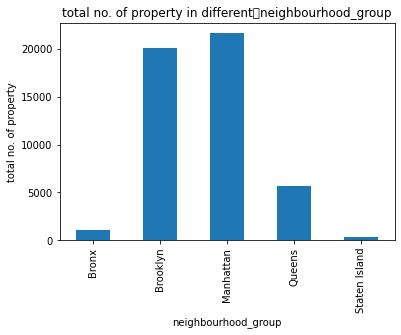

In [ ]:
ac.plot(kind='bar')
plt.title("total no. of property in different	neighbourhood_group")
plt.ylabel("total no. of property")
plt.xlabel("neighbourhood_group")

### maximum no. of hotels

In [61]:
top_hotel_fre=df['name'].value_counts()[:10]
top_hotel_fre

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Artsy Private BR in Fort Greene Cumberland    10
Private room                                  10
Beautiful Brooklyn Brownstone                  8
Private room in Brooklyn                       8
Name: name, dtype: int64

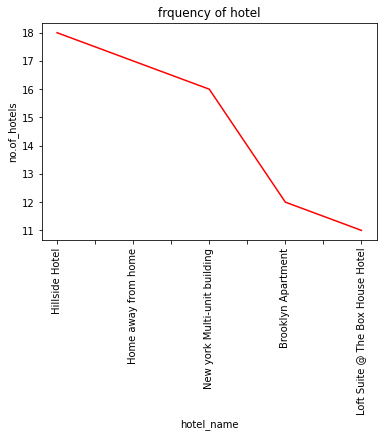

In [42]:
top_hotel_fre.plot.line(rot=90,color='r',title="frquency of hotel",xlabel="hotel_name",ylabel="no.of_hotels")

# mean_no._of_reviews


In [62]:
mean_number_of_reviews=df.groupby(["neighbourhood_group","room_type"])["number_of_reviews"].mean()
mean_number_of_reviews

neighbourhood_group  room_type      
Bronx                Entire home/apt    30.678100
                     Private room       25.018405
                     Shared room         7.200000
Brooklyn             Entire home/apt    27.945183
                     Private room       21.086952
                     Shared room        14.026634
Manhattan            Entire home/apt    17.815516
                     Private room       26.202706
                     Shared room        21.400000
Queens               Entire home/apt    28.933206
                     Private room       27.746441
                     Shared room        13.863636
Staten Island        Entire home/apt    33.278409
                     Private room       30.159574
                     Shared room         1.555556
Name: number_of_reviews, dtype: float64

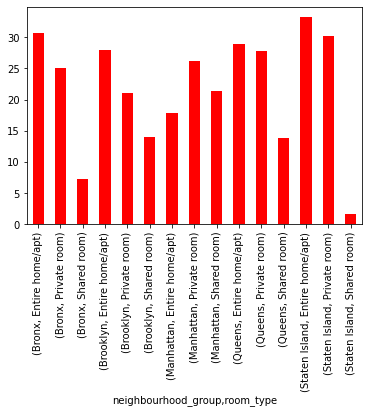

In [31]:
mean_number_of_reviews.plot(kind="bar",color="r")

### maximum_reviews_of_hotel

In [47]:
maximum_reviews_of_hotel=df.groupby(["name"])["number_of_reviews"].max().sort_values(ascending=False)[:10]
maximum_reviews_of_hotel

name
Room near JFK Queen Bed                              629
Great Bedroom in Manhattan                           607
Beautiful Bedroom in Manhattan                       597
Private Bedroom in Manhattan                         594
Room Near JFK Twin Beds                              576
Steps away from Laguardia airport                    543
Manhattan Lux Loft.Like.Love.Lots.Look !             540
Cozy Room Family Home LGA Airport NO CLEANING FEE    510
Private brownstone studio Brooklyn                   488
LG Private Room/Family Friendly                      480
Name: number_of_reviews, dtype: int64

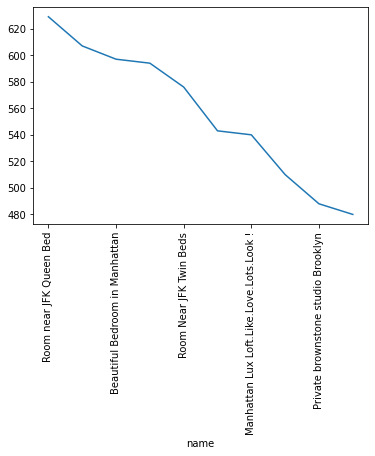

In [49]:
maximum_reviews_of_hotel.plot(rot=90)

#No. of Different room_types in differnt neighbourhood_groups

In [ ]:
Shared=df.groupby(["neighbourhood_group","room_type"])["room_type"].count().unstack("room_type")
Shared

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0, 0.5, 'room_type')

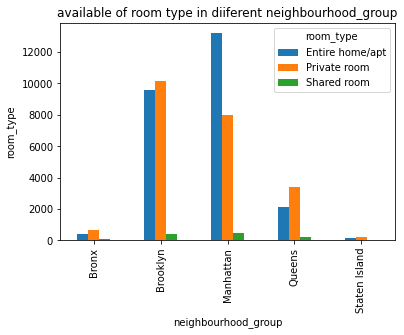

In [ ]:
 Shared.plot(kind="bar")
plt.title("available of room type in diiferent neighbourhood_group")
plt.xlabel("neighbourhood_group")
plt.ylabel("room_type")

# Mean_price of the different roomtype according to different neighourhood_group

In [117]:
xyz=df.groupby(["neighbourhood_group","room_type"])["price"].mean().unstack()
xyz

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


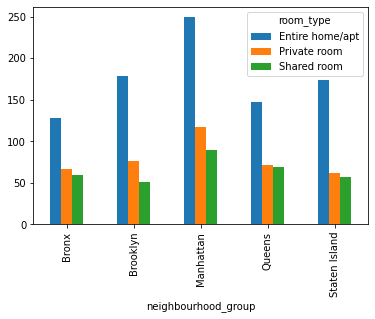

In [118]:
xyz.plot(kind="bar")

##Highest_price_hotel_of_each_neighbourhood_grp

In [89]:
highestprice_hotels_nghgrp=df.groupby(["neighbourhood_group","name"][:1])["price"].max().sort_values(ascending=False)
highestprice_hotels_nghgrp

neighbourhood_group
Queens           10000
Manhattan        10000
Brooklyn         10000
Staten Island     5000
Bronx             2500
Name: price, dtype: int64

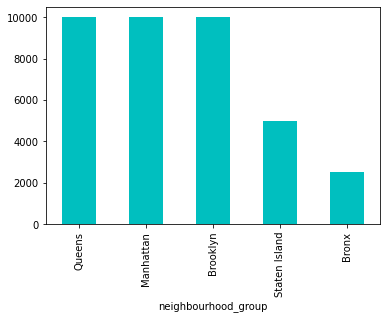

In [96]:
highestprice_hotels_nghgrp.plot.bar(color='c')

### all_total_costliest_hotels

In [82]:
top_highest_price_hotels=df.groupby(["name"])["price"].max().sort_values(ascending=False)[:10]
top_highest_price_hotels

name
Furnished room in Astoria apartment                   10000
1-BR Lincoln Center                                   10000
Luxury 1 bedroom apt. -stunning Manhattan views       10000
Quiet, Clean, Lit @ LES & Chinatown                    9999
2br - The Heart of NYC: Manhattans Lower East Side     9999
Spanish Harlem Apt                                     9999
Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho      8500
Film Location                                          8000
East 72nd Townhouse by (Hidden by Airbnb)              7703
70' Luxury MotorYacht on the Hudson                    7500
Name: price, dtype: int64

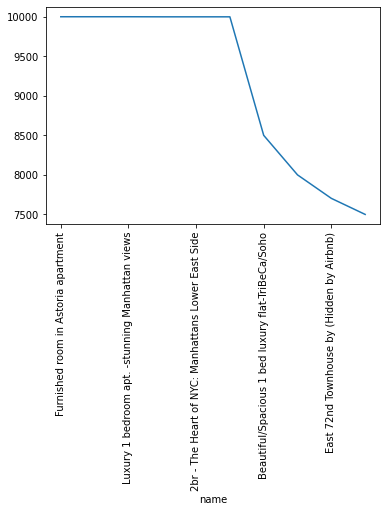

In [84]:
top_highest_price_hotels.plot(rot='90')

# New Section

In [106]:
host_with_mosthotels=df.groupby(["host_id","host_name"])["calculated_host_listings_count"].max().sort_values(ascending=False)

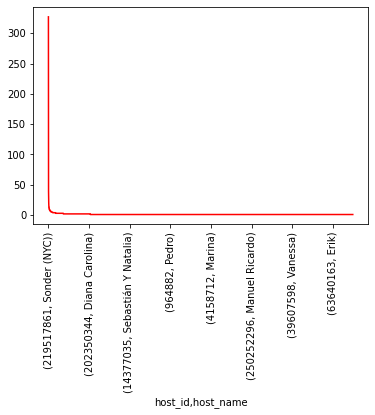

In [115]:
host_with_mosthotels.plot(rot=90,color="r")

# corelation of dataframe

In [ ]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


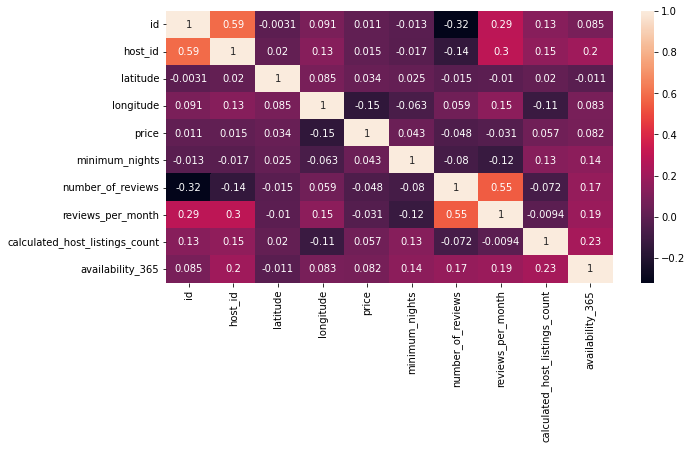

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)